PREDECIR LA EFICIENCIA DEL COMBUSTIBLE

En esta actividad utilizaremos clasico conjunto de Autos  Auto MPG. Vamos a Diseñar un modelo con Keras. para predecir la eficiencia del combustible de Automoviles de finales de los 70`s y Principios de los 80`s  

In [1]:
# Importar Bibliotecas Basicas
import matplotlib.pyplot as pit
import numpy as np
import pandas as pd
import seaborn as sns #Biblioteca de Visualizacion de Datos Basada en matplotlib

In [2]:
# Importar Bibliotecas de Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

El Conjunto de Datos Auto MPG

El conjunto de datos está disponible en el repositorio de aprendizaje automático de la UCI (University of California, Irvine).

Obtener los datos: Descargar e importar el conjunto de datos utilizando pandas.

In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [6]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


MPG (Miles per gallon): Esta es la variable objetivo que se quiere predecir. Representa la eficiencia de combustible del vehículo en millas por galón.

cylinders (Cilindros): Número de cilindros en el motor del automóvil. Esta variable es de tipo entero y puede tomar valores como 3, 4, 5, 6 u 8 cilindros.

Displacement (Desplazamiento): Desplazamiento del motor en pulgadas cúbicas. Esta es una variable numérica continua que mide el volumen total de todos los cilindros del motor (conocida en Colombia como cilindraje).

Horsepower (Caballos de fuerza): Potencia del motor medida en caballos de fuerza. Esta variable es numérica continua.

Weight (Peso): Peso del vehículo en libras. Esta es una variable numérica continua.

Acceleration (Aceleración): Tiempo que toma el vehículo en acelerar de 0 a 60 millas por hora, medido en segundos. Esta es una variable numérica continua.

Model year (Año del modelo): Año en el que el modelo del automóvil fue fabricado. Esta variable es de tipo entero y generalmente está codificada como el último dígito del año (por ejemplo, '70' para 1970).

Origin (Origen): Región de origen del vehículo. Esta variable es categórica y toma tres valores:

1: América (USA)
2: Europa
3: Asia

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [10]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


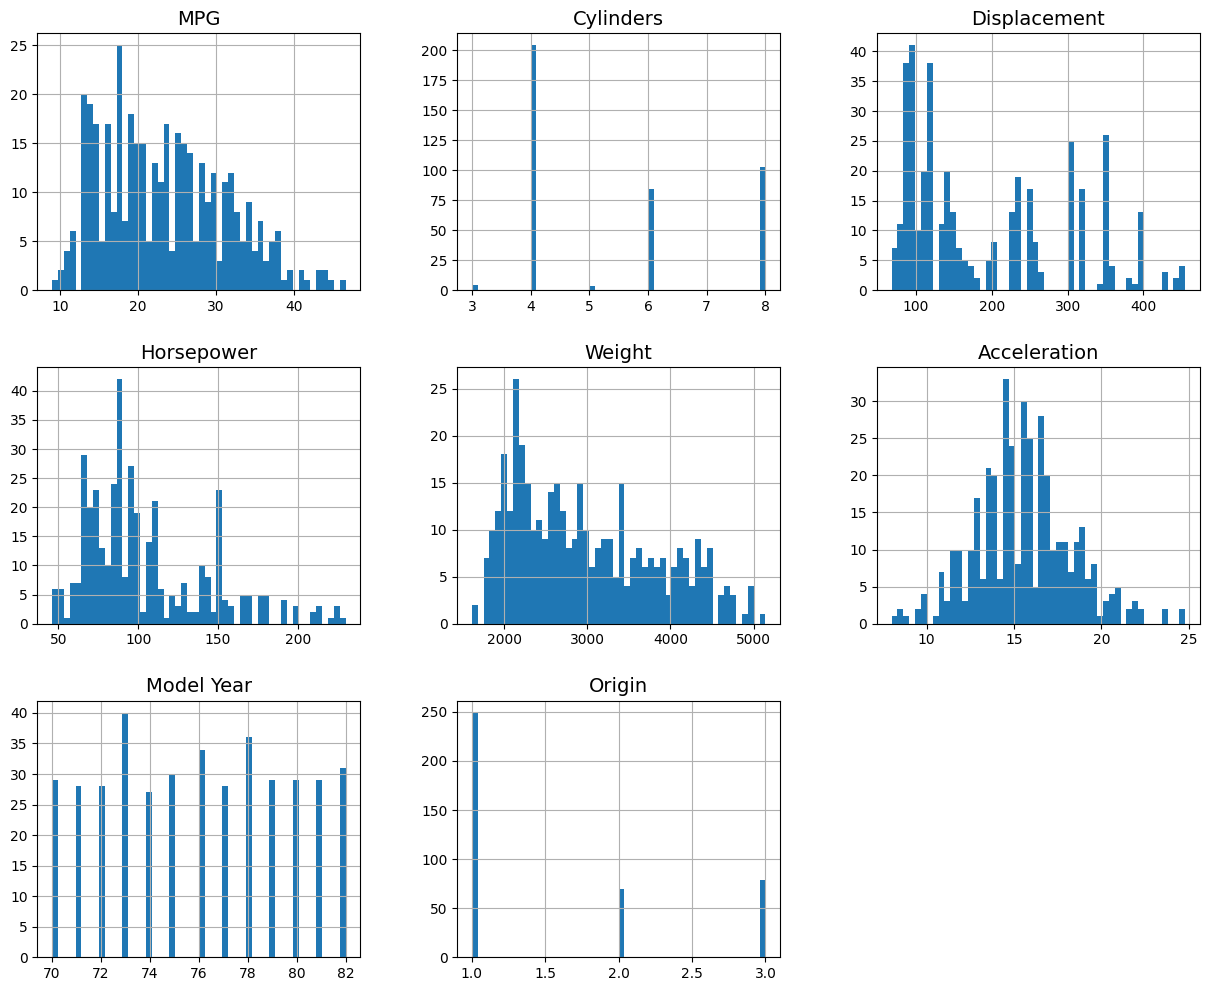

In [12]:
import matplotlib.pyplot as plt # Changed 'pit' to 'plt'

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

dataset.hist(bins=50, figsize=(15, 12))
plt.show()

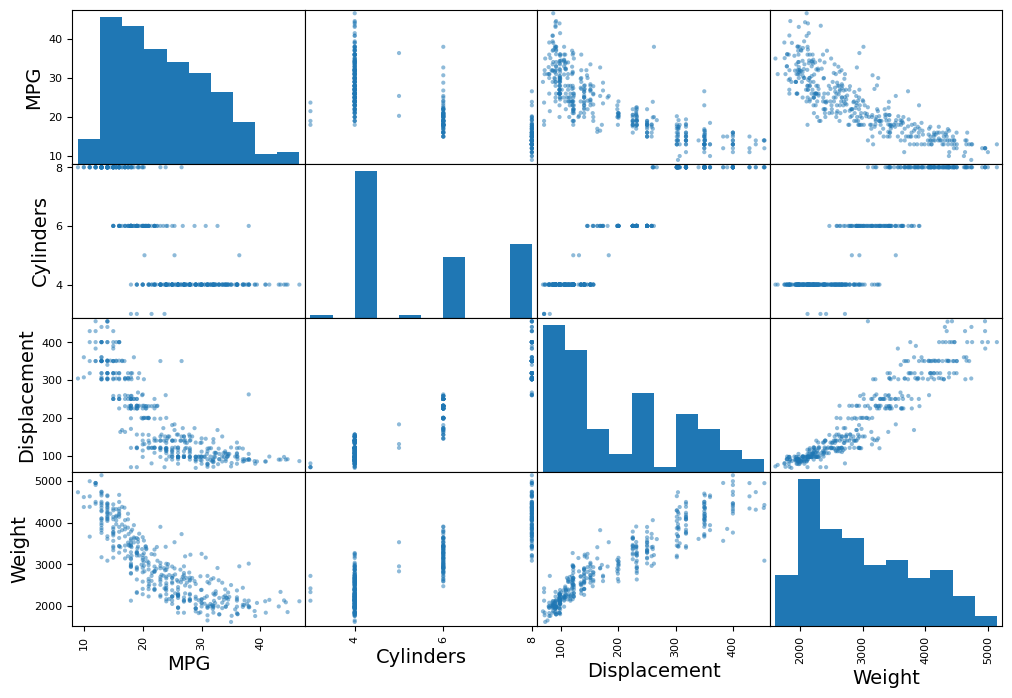

In [13]:
from pandas.plotting import scatter_matrix

attributes = ['MPG', 'Cylinders', 'Displacement', 'Weight']
scatter_matrix(dataset[attributes], figsize=(12, 8))
plt.show()

Verificar Datos Faltantes y Datos Categoticos

In [14]:
# El dataset contiene algunos valores faltantes.

dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [15]:
# Completar datos faltantes

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
dataset['Horsepower'] = imputer.fit_transform(dataset[['Horsepower']])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [16]:
# Verificamos que el dataset ya NO contiene valores faltantes.

dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [17]:
# La columna de "Origin" realmente es categórica. Entonces la convertimos a "one-hot":

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
origin_encoded = encoder.fit_transform(dataset[['Origin']])
dataset[['USA','Europe','Japan']] = origin_encoded
dataset.drop('Origin',axis=1,inplace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


Dividir el Entrenamiento en Prueba

In [18]:
# Primero dividamos las características de las etiquetas

X = dataset.drop('MPG',axis=1)
y = dataset['MPG']

In [19]:
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [20]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: MPG, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Constuccion de un Modelo


Ya tenemos todo listo para construir el modelo de regresión con Keras.

Recuerde estandarizar los datos antes de entrenar.

Grafique la pérdida en los datos de entrenamiento y validación.

Calcule las métricas de desempeño usadas típicamente en problemas de regresión.


In [23]:
tf.keras.backend.clear_session()

In [31]:
# Declarar el Modelo

tf.random.set_seed(59)
Normalizer =tf.keras.layers.Normalization(input_shape=[len(X.keys())])